In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
fparks = gpd.read_file('../data/metro_park_boundaries.geojson')
fparks

acres                  name year_estab  \
0             69.86    Harpeth River Park       1988   
1              9.88    Harpeth Knoll Park       1972   
2             17.14         Bellevue Park       1982   
3            809.59       Bells Bend Park       2007   
4          2168.792  Alvin G. Beaman Park       1996   
..              ...                   ...        ...   
282    3.7454340524                  None       2003   
283   1.46849965739                  None       2000   
284  0.181880190971                  None       2003   
285   7.30424931138                  None       2014   
286   6.50392802351                  None       2002   

                                    common_nam status  \
0                                Harpeth River   PARK   
1                                Harpeth Knoll   PARK   
2                                  Red Caboose   PARK   
3                                   Bells Bend   PARK   
4                                       Beaman   PARK   
..                                         ...    ...   
282  Stones River Greenway - Lebanon Pk to Dam     GW   
283          Stones River Greenway - Alta Lake     GW   
284  Stones River Greenway - Lebanon Pk to Dam     GW   
285              Whites Creek Community Garden   PARK   
286    Mill Creek Greenway - Whittimore Branch     GW   

                     address           lon          lat  \
0        7820 Coley Davis Rd   -86.9592214  36.07738249   
1    708 Goodpasture Terrace  -86.93815537  36.05942777   
2       656 Colice Jeanne Rd  -86.93354496  36.07159731   
3      4187 Old Hickory Blvd  -86.92646294  36.15016925   
4     5911 Old Hickory Blvd.  -86.91984207  36.26075833   
..                       ...           ...          ...   
282  100 Stewarts Ferry Pkwy             0            0   
283             3940 Bell Rd             0            0   
284                     None             0            0   
285   3832 Whites Creek Pike             0            0   
286    5824 Nolensville Pike             0            0   

                                            descriptio  \
0    Harpeth River State Park has much historical a...   
1    Huge grassy field with playground, and shade s...   
2    Bellevue Park, known as Red Caboose Park, is p...   
3    Located in western Davidson County, this park ...   
4    Beaman Park provides education and awareness p...   
..                                                 ...   
282                                               None   
283                                               None   
284                                               None   
285                                               None   
286                                               None   

                                              geometry  
0    MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...  
1    MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...  
2    MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...  
3    MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...  
4    MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...  
..                                                 ...  
282  MULTIPOLYGON (((-86.62732 36.16291, -86.62669 ...  
283  MULTIPOLYGON (((-86.60819 36.16592, -86.60817 ...  
284  MULTIPOLYGON (((-86.64052 36.17177, -86.64067 ...  
285  MULTIPOLYGON (((-86.82873 36.25082, -86.82857 ...  
286  MULTIPOLYGON (((-86.71266 36.04247, -86.71235 ...  

[287 rows x 10 columns]

In [3]:
fparks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
art = gpd.read_file('../data/metro_arts_public_artwork.geojson')
art

first_name                       location project_status   latitude  \
0            KJ      Historic Metro Courthouse       Complete  36.166747   
1    Michael J.      Historic Metro Courthouse       Complete  36.166747   
2          Paul          Metro Office Building       Complete  36.153121   
3          Bill      Historic Metro Courthouse       Complete  36.166747   
4         Brady      Historic Metro Courthouse       Complete  36.166747   
..          ...                            ...            ...        ...   
173         Gil      Historic Metro Courthouse       Complete  36.166747   
174      Austin      Historic Metro Courthouse       Complete  36.166747   
175        Edie         Madison Branch Library       Complete   36.25756   
176    Lawrence                    Shelby Park       Complete  36.168381   
177  Brandon J.  Madison Park Community Center       Complete  36.265752   

                                           description  \
0    These works are primarily about creative pract...   
1    Created during a live painting exhibition, thi...   
2    This work is part of a series of on-site drawi...   
3    The subject is a close friend of the artist, a...   
4    Based on impressions and landmarks of Nashvill...   
..                                                 ...   
173  Through exploring what happens when paint leav...   
174  Hand lettered and near dilapidated old signpos...   
175  Forever Sublime denotes something that is elev...   
176  Installed fall of 2012, Reflection is located ...   
177  The Art of Fitness is a three-part public art ...   

                                          medium   longitude   last_name  \
0             colored tape over color photograph  -86.778286  Schumacher   
1                              acrylic on canvas  -86.778286     McBride   
2                       ink (posca pen) on paper  -86.768797     Collins   
3                                   oil on linen  -86.778286   Killebrew   
4                                   oil on linen  -86.778286      Haston   
..                                           ...         ...         ...   
173  acrylic on wood, canvas and plexiglass rods  -86.778286       Given   
174      watercolor with colored pencil on paper  -86.778286      Reavis   
175                            Acrylic on canvas   -86.71545       Maney   
176                stainless steel, granite base  -86.729916      Argent   
177                  digital prints, vinyl lamin   -866.7006     Donahue   

                                             page_link  \
0    https://www.metroartsnashville.com/fullscreen-...   
1    https://www.metroartsnashville.com/fullscreen-...   
2    https://www.metroartsnashville.com/fullscreen-...   
3    https://www.metroartsnashville.com/fullscreen-...   
4    https://www.metroartsnashville.com/fullscreen-...   
..                                                 ...   
173  https://www.metroartsnashville.com/fullscreen-...   
174  https://www.metroartsnashville.com/fullscreen-...   
175  https://www.metroartsnashville.com/lending-lib...   
176  https://www.metroartsnashville.com/fullscreen-...   
177  https://www.metroartsnashville.com/fullscreen-...   

                                   artwork                 geometry  
0                                 B.032.02   POINT (-86.778 36.167)  
1    Dancing  in the Streets of Music City   POINT (-86.778 36.167)  
2          Idle Bloom at Grimey's Basement   POINT (-86.769 36.153)  
3                        News of The World   POINT (-86.778 36.167)  
4                                   Runner   POINT (-86.778 36.167)  
..                                     ...                      ...  
173                             Sentinel I   POINT (-86.778 36.167)  
174                               Untitled   POINT (-86.778 36.167)  
175                        Forever Sublime   POINT (-86.715 36.258)  
176                             Reflection   POINT (-86.730 36.168)  
177        The 

In [5]:
art.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
fmarkers = gpd.read_file('../data/historical_markers.geojson')
fmarkers

number                                           location   latitude  \
0        6                                  4618 Lealand Lane  36.086311   
1       90                               2000 Edgehill Avenue   36.14399   
2      168                                      621 Hill Road  36.047802   
3       19  Meharry Medical College, D.B. Todd Boulvard en...   36.16677   
4       29   Hospital Drive off of Neely's Bend Road, Madison  36.250539   
..     ...                                                ...        ...   
215     30  Swinging Bridge Road and Cinder Road, Old Hickory  36.277097   
216    118                 Sevier Park 3000 Granny White Pike  36.119859   
217    101             Belmont University Campus Freeman Hall  36.135886   
218    116         Tolbert Road, off of Old Hickory Boulevard  36.106301   
219    163                                 200 Nashboro Blvd.  36.088169   

                                marker_name  \
0        Battle of Nashville Stewart's Line   
1            University School of Nashville   
2    May-granbery House and Alford Cemetery   
3                   Meharry Medical College   
4                           Madison College   
..                                      ...   
215                Old Hickory Powder Plant   
216                               Sunnyside   
217         Nashville's First Radio Station   
218                          Tolbert Hollow   
219                                Grandale   

                                           marker_text   longitude  \
0    Loring's division of Stewart's Corps, Hood's C...  -86.791167   
1    Founded in 1915 as the successor to The Winthr...  -86.798228   
2    Revolutionary War Pvt. John Alford built a two...  -86.754991   
3    Meharry Medical College, established in 1876 t...  -86.805937   
4    Madison College was founded in 1904 as Nashvil...  -86.683834   
..                                                 ...         ...   
215  Site of the $87,000,000 Old Hickory Powder Pla...  -86.669215   
216  Home of Mary Benton, widow of Jesse Benton who...  -86.790745   
217  June 1922, Boy Scout John H. DeWitt, Jr., star...  -86.794723   
218  George Tolbert, a farmer, bought 97½ acres her...  -86.921666   
219  Built in the 1830s, rebuilt in 1859, and expan...  -86.646253   

    year_erected condition                         notes civil_war_site  \
0           1968      None                          None           TRUE   
1           1992      None                          None           None   
2           2018      None            Council District 4           None   
3           1969      None                 replaced 2012           None   
4           1970      None                          None           None   
..           ...       ...                           ...            ...   
215         1970      None                          None           None   
216         2004      None        replaced #22 Sunnyside           None   
217         1997      None                          None           None   
218         2003      None                          None           None   
219         2018      None  Marker Project-priority list           None   

                       geometry  
0    POINT (-86.79117 36.08631)  
1    POINT (-86.79823 36.14399)  
2    POINT (-86.75499 36.04780)  
3    POINT (-86.80594 36.16677)  
4    POINT (-86.68383 36.25054)  
..                          ...  
215  POINT (-86.66921 36.27710)  
216  POINT (-86.79075 36.11986)  
217  POINT (-86.79472 36.13589)  
218  POINT (-86.92167 36.10630)  
219  POINT (-86.64625 36.08817)  

[220 rows x 11 columns]

In [26]:
fmarkers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
fparks['planar_crs'] = fparks['geometry'].to_crs(epsg=2163)
fparks['park_area_acres'] = ((fparks['planar_crs'].area)/4046.8564224)
fparks.head(2)

acres                name year_estab     common_nam status  \
0  69.86  Harpeth River Park       1988  Harpeth River   PARK   
1   9.88  Harpeth Knoll Park       1972  Harpeth Knoll   PARK   

                   address           lon          lat  \
0      7820 Coley Davis Rd   -86.9592214  36.07738249   
1  708 Goodpasture Terrace  -86.93815537  36.05942777   

                                          descriptio  \
0  Harpeth River State Park has much historical a...   
1  Huge grassy field with playground, and shade s...   

                                            geometry  \
0  MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...   
1  MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...   

                                          planar_crs  park_area_acres  
0  MULTIPOLYGON (((1170063.717 -900039.052, 11700...        69.859184  
1  MULTIPOLYGON (((1171853.618 -901843.105, 11719...         9.884010

In [10]:
fparks['p_centroid'] = fparks['planar_crs'].centroid
fparks['central_point'] = fparks['p_centroid'].to_crs('epsg:4326')
fparks.head(2)

acres                name year_estab     common_nam status  \
0  69.86  Harpeth River Park       1988  Harpeth River   PARK   
1   9.88  Harpeth Knoll Park       1972  Harpeth Knoll   PARK   

                   address           lon          lat  \
0      7820 Coley Davis Rd   -86.9592214  36.07738249   
1  708 Goodpasture Terrace  -86.93815537  36.05942777   

                                          descriptio  \
0  Harpeth River State Park has much historical a...   
1  Huge grassy field with playground, and shade s...   

                                            geometry  \
0  MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...   
1  MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...   

                                          planar_crs  park_area_acres  \
0  MULTIPOLYGON (((1170063.717 -900039.052, 11700...        69.859184   
1  MULTIPOLYGON (((1171853.618 -901843.105, 11719...         9.884010   

                        p_centroid               central_point  
0  POINT (1169857.545 -900330.738)  POINT (-86.95820 36.07700)  
1  POINT (1171914.120 -901984.902)  POINT (-86.93816 36.05943)

In [11]:
fparks['status'].value_counts()

PARK          124
GW             99
PLAYGROUND     51
TENNIS         13
Name: status, dtype: int64

In [19]:
parks = fparks.drop(['planar_crs', 'park_area_acres', 'p_centroid'], axis = 1)
parks

acres                  name year_estab  \
0             69.86    Harpeth River Park       1988   
1              9.88    Harpeth Knoll Park       1972   
2             17.14         Bellevue Park       1982   
3            809.59       Bells Bend Park       2007   
4          2168.792  Alvin G. Beaman Park       1996   
..              ...                   ...        ...   
282    3.7454340524                  None       2003   
283   1.46849965739                  None       2000   
284  0.181880190971                  None       2003   
285   7.30424931138                  None       2014   
286   6.50392802351                  None       2002   

                                    common_nam status  \
0                                Harpeth River   PARK   
1                                Harpeth Knoll   PARK   
2                                  Red Caboose   PARK   
3                                   Bells Bend   PARK   
4                                       Beaman   PARK   
..                                         ...    ...   
282  Stones River Greenway - Lebanon Pk to Dam     GW   
283          Stones River Greenway - Alta Lake     GW   
284  Stones River Greenway - Lebanon Pk to Dam     GW   
285              Whites Creek Community Garden   PARK   
286    Mill Creek Greenway - Whittimore Branch     GW   

                     address           lon          lat  \
0        7820 Coley Davis Rd   -86.9592214  36.07738249   
1    708 Goodpasture Terrace  -86.93815537  36.05942777   
2       656 Colice Jeanne Rd  -86.93354496  36.07159731   
3      4187 Old Hickory Blvd  -86.92646294  36.15016925   
4     5911 Old Hickory Blvd.  -86.91984207  36.26075833   
..                       ...           ...          ...   
282  100 Stewarts Ferry Pkwy             0            0   
283             3940 Bell Rd             0            0   
284                     None             0            0   
285   3832 Whites Creek Pike             0            0   
286    5824 Nolensville Pike             0            0   

                                            descriptio  \
0    Harpeth River State Park has much historical a...   
1    Huge grassy field with playground, and shade s...   
2    Bellevue Park, known as Red Caboose Park, is p...   
3    Located in western Davidson County, this park ...   
4    Beaman Park provides education and awareness p...   
..                                                 ...   
282                                               None   
283                                               None   
284                                               None   
285                                               None   
286                                               None   

                                              geometry  \
0    MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...   
1    MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...   
2    MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...   
3    MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...   
4    MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...   
..                                                 ...   
282  MULTIPOLYGON (((-86.62732 36.16291, -86.62669 ...   
283  MULTIPOLYGON (((-86.60819 36.16592, -86.60817 ...   
284  MULTIPOLYGON (((-86.64052 36.17177, -86.64067 ...   
285  MULTIPOLYGON (((-86.82873 36.25082, -86.82857 ...   
286  MULTIPOLYGON (((-86.71266 36.04247, -86.71235 ...   

                  central_point  
0    POINT (-86.95820 36.07700)  
1    POINT (-86.93816 36.05943)  
2    POINT (-86.93354 36.07160)  
3    POINT (-86.92646 36.15017)  
4    POINT (-86.92705 36.25907)  
..                          ...  
282  POINT (-86.62439 36.16174)  
283  POINT (-86.60553 36.16567)  
284  POINT (-86.64075 36.17175)  
285  POINT (-86.82833 36.24953)  
286  POINT (-86.71056 36.04204)  

[287 rows x 11 columns]

In [20]:
parks['status'].value_counts()

PARK          124
GW             99
PLAYGROUND     51
TENNIS         13
Name: status, dtype: int64

In [23]:
parks = parks.loc[parks['status'] == 'PARK']
parks = parks.reset_index(drop=True)
parks

acres                  name year_estab  \
0             69.86    Harpeth River Park       1988   
1              9.88    Harpeth Knoll Park       1972   
2             17.14         Bellevue Park       1982   
3            809.59       Bells Bend Park       2007   
4          2168.792  Alvin G. Beaman Park       1996   
..              ...                   ...        ...   
119           12.54       Riverfront Park       2015   
120   12.1363239095                  None       2014   
121   172.469097357                  None       2015   
122  0.348173874743                  None       2012   
123   7.30424931138                  None       2014   

                        common_nam status                   address  \
0                    Harpeth River   PARK       7820 Coley Davis Rd   
1                    Harpeth Knoll   PARK   708 Goodpasture Terrace   
2                      Red Caboose   PARK      656 Colice Jeanne Rd   
3                       Bells Bend   PARK     4187 Old Hickory Blvd   
4                           Beaman   PARK    5911 Old Hickory Blvd.   
..                             ...    ...                       ...   
119            Ascend Amphitheater   PARK             310 1st Ave S   
120     Southeast Community Center   PARK  5260 HICKORY HOLLOW PKWY   
121                      Ravenwood   PARK      1176 Stones River Rd   
122              Browns Creek Park   PARK              817 PARK TER   
123  Whites Creek Community Garden   PARK    3832 Whites Creek Pike   

              lon          lat  \
0     -86.9592214  36.07738249   
1    -86.93815537  36.05942777   
2    -86.93354496  36.07159731   
3    -86.92646294  36.15016925   
4    -86.91984207  36.26075833   
..            ...          ...   
119    -86.771861    36.160147   
120    -86.656256    36.052968   
121     -86.64606    36.190034   
122    -86.776659    36.113452   
123             0            0   

                                            descriptio  \
0    Harpeth River State Park has much historical a...   
1    Huge grassy field with playground, and shade s...   
2    Bellevue Park, known as Red Caboose Park, is p...   
3    Located in western Davidson County, this park ...   
4    Beaman Park provides education and awareness p...   
..                                                 ...   
119                                               None   
120                                               None   
121                                               None   
122                                               None   
123                                               None   

                                              geometry  \
0    MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...   
1    MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...   
2    MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...   
3    MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...   
4    MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...   
..                                                 ...   
119  MULTIPOLYGON (((-86.77215 36.16130, -86.77074 ...   
120  MULTIPOLYGON (((-86.65684 36.05397, -86.65686 ...   
121  MULTIPOLYGON (((-86.64250 36.19188, -86.64261 ...   
122  MULTIPOLYGON (((-86.77669 36.11392, -86.77659 ...   
123  MULTIPOLYGON (((-86.82873 36.25082, -86.82857 ...   

                  central_point  
0    POINT (-86.95820 36.07700)  
1    POINT (-86.93816 36.05943)  
2    POINT (-86.93354 36.07160)  
3    POINT (-86.92646 36.15017)  
4    POINT (-86.92705 36.25907)  
..                          ...  
119  POINT (-86.77175 36.16015)  
120  POINT (-86.65629 36.05295)  
121  POINT (-86.64469 36.19044)  
122  POINT (-86.77634 36.11336)  
123  POINT (-86.82833 36.24953)  

[124 rows x 11 columns]

<AxesSubplot:>

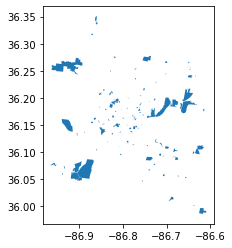

In [24]:
parks.plot()

In [30]:
fmarkers.head(10)

number                                           location   latitude  \
0      6                                  4618 Lealand Lane  36.086311   
1     90                               2000 Edgehill Avenue   36.14399   
2    168                                      621 Hill Road  36.047802   
3     19  Meharry Medical College, D.B. Todd Boulvard en...   36.16677   
4     29   Hospital Drive off of Neely's Bend Road, Madison  36.250539   
5     62  Charlotte Pike (Hwy 70), between Buffalo Road ...    36.0917   
6    126         Granny White Pike at Richland Country Club  36.050964   
7    183                       Kenner Ave. at Woodmont Cir.  36.119153   
8    212                             1607 18th Avenue South  36.138601   
9    115  Corner of Old Ezell Road and Donelson Pike/Har...  36.098286   

                                         marker_name  \
0                 Battle of Nashville Stewart's Line   
1                     University School of Nashville   
2             May-granbery House and Alford Cemetery   
3                            Meharry Medical College   
4                                    Madison College   
5                                      Newsom's Mill   
6  Battle of Nashville (december 16, 1864) Assaul...   
7                     Kenner Manor Historic District   
8                                 Betty Chiles Nixon   
9                                        Ezell House   

                                         marker_text   longitude year_erected  \
0  Loring's division of Stewart's Corps, Hood's C...  -86.791167         1968   
1  Founded in 1915 as the successor to The Winthr...  -86.798228         1992   
2  Revolutionary War Pvt. John Alford built a two...  -86.754991         2018   
3  Meharry Medical College, established in 1876 t...  -86.805937         1969   
4  Madison College was founded in 1904 as Nashvil...  -86.683834         1970   
5  The original Newsom's Mill was located upstrea...  -86.986567         1976   
6  During the retreat from Nashville, Colonel Edm...  -86.816416         2008   
7  Originally part of the Woodlawn estate, this p...  -86.840325         2018   
8  Betty Nixon was a trailblazing woman in Nashvi...  -86.796764         None   
9  In 1805 Jeremiah Ezell (1775-1838) moved here ...  -86.677242         2003   

              condition                             notes civil_war_site  \
0                  None                              None           TRUE   
1                  None                              None           None   
2                  None                Council District 4           None   
3                  None                     replaced 2012           None   
4                  None                              None           None   
5                  None                              None           None   
6                  None  Donated by Richland Country Club           TRUE   
7                  None                              None           None   
8  ordered/ not arrived                              None           None   
9                  None                  replaced in 2017           None   

                     geometry  
0  POINT (-86.79117 36.08631)  
1  POINT (-86.79823 36.14399)  
2  POINT (-86.75499 36.04780)  
3  POINT (-86.80594 36.16677)  
4  POINT (-86.68383 36.25054)  
5  POINT (-86.98657 36.09170)  
6  POINT (-86.81642 36.05096)  
7  POINT (-86.84033 36.11915)  
8  POINT (-86.79676 36.13860)  
9  POINT (-86.67724 36.09829)

In [29]:
fmarkers['condition'].value_counts()

ordered/ not arrived                  5
waiting to install                    5
NOT UP YET                            2
CURRENTLY DOWN                        2
DOWN DURING CONSTRUCTION              2
CURRENTLY MISSING                     1
CURRENTLY DOWN DURING CONSTRUCTION    1
Name: condition, dtype: int64

In [44]:
markers = fmarkers.loc[~fmarkers['condition'].isin(['ordered/ not arrived', 'waiting to install', 
                                                   'NOT UP YET', 'CURRENTLY DOWN', 'DOWN DURING CONSTRUCTION',
                                                   'CURRENTLY MISSING', 'CURRENTLY DOWN DURING CONSTRUCTION'])]
markers = markers.reset_index(drop=True)
markers

number                                           location   latitude  \
0        6                                  4618 Lealand Lane  36.086311   
1       90                               2000 Edgehill Avenue   36.14399   
2      168                                      621 Hill Road  36.047802   
3       19  Meharry Medical College, D.B. Todd Boulvard en...   36.16677   
4       29   Hospital Drive off of Neely's Bend Road, Madison  36.250539   
..     ...                                                ...        ...   
197     30  Swinging Bridge Road and Cinder Road, Old Hickory  36.277097   
198    118                 Sevier Park 3000 Granny White Pike  36.119859   
199    101             Belmont University Campus Freeman Hall  36.135886   
200    116         Tolbert Road, off of Old Hickory Boulevard  36.106301   
201    163                                 200 Nashboro Blvd.  36.088169   

                                marker_name  \
0        Battle of Nashville Stewart's Line   
1            University School of Nashville   
2    May-granbery House and Alford Cemetery   
3                   Meharry Medical College   
4                           Madison College   
..                                      ...   
197                Old Hickory Powder Plant   
198                               Sunnyside   
199         Nashville's First Radio Station   
200                          Tolbert Hollow   
201                                Grandale   

                                           marker_text   longitude  \
0    Loring's division of Stewart's Corps, Hood's C...  -86.791167   
1    Founded in 1915 as the successor to The Winthr...  -86.798228   
2    Revolutionary War Pvt. John Alford built a two...  -86.754991   
3    Meharry Medical College, established in 1876 t...  -86.805937   
4    Madison College was founded in 1904 as Nashvil...  -86.683834   
..                                                 ...         ...   
197  Site of the $87,000,000 Old Hickory Powder Pla...  -86.669215   
198  Home of Mary Benton, widow of Jesse Benton who...  -86.790745   
199  June 1922, Boy Scout John H. DeWitt, Jr., star...  -86.794723   
200  George Tolbert, a farmer, bought 97½ acres her...  -86.921666   
201  Built in the 1830s, rebuilt in 1859, and expan...  -86.646253   

    year_erected condition                         notes civil_war_site  \
0           1968      None                          None           TRUE   
1           1992      None                          None           None   
2           2018      None            Council District 4           None   
3           1969      None                 replaced 2012           None   
4           1970      None                          None           None   
..           ...       ...                           ...            ...   
197         1970      None                          None           None   
198         2004      None        replaced #22 Sunnyside           None   
199         1997      None                          None           None   
200         2003      None                          None           None   
201         2018      None  Marker Project-priority list           None   

                       geometry  
0    POINT (-86.79117 36.08631)  
1    POINT (-86.79823 36.14399)  
2    POINT (-86.75499 36.04780)  
3    POINT (-86.80594 36.16677)  
4    POINT (-86.68383 36.25054)  
..                          ...  
197  POINT (-86.66921 36.27710)  
198  POINT (-86.79075 36.11986)  
199  POINT (-86.79472 36.13589)  
200  POINT (-86.92167 36.10630)  
201  POINT (-86.64625 36.08817)  

[202 rows x 11 columns]

In [45]:
markers = markers.drop(['number', 'condition'], axis=1)
markers

location   latitude  \
0                                    4618 Lealand Lane  36.086311   
1                                 2000 Edgehill Avenue   36.14399   
2                                        621 Hill Road  36.047802   
3    Meharry Medical College, D.B. Todd Boulvard en...   36.16677   
4     Hospital Drive off of Neely's Bend Road, Madison  36.250539   
..                                                 ...        ...   
197  Swinging Bridge Road and Cinder Road, Old Hickory  36.277097   
198                 Sevier Park 3000 Granny White Pike  36.119859   
199             Belmont University Campus Freeman Hall  36.135886   
200         Tolbert Road, off of Old Hickory Boulevard  36.106301   
201                                 200 Nashboro Blvd.  36.088169   

                                marker_name  \
0        Battle of Nashville Stewart's Line   
1            University School of Nashville   
2    May-granbery House and Alford Cemetery   
3                   Meharry Medical College   
4                           Madison College   
..                                      ...   
197                Old Hickory Powder Plant   
198                               Sunnyside   
199         Nashville's First Radio Station   
200                          Tolbert Hollow   
201                                Grandale   

                                           marker_text   longitude  \
0    Loring's division of Stewart's Corps, Hood's C...  -86.791167   
1    Founded in 1915 as the successor to The Winthr...  -86.798228   
2    Revolutionary War Pvt. John Alford built a two...  -86.754991   
3    Meharry Medical College, established in 1876 t...  -86.805937   
4    Madison College was founded in 1904 as Nashvil...  -86.683834   
..                                                 ...         ...   
197  Site of the $87,000,000 Old Hickory Powder Pla...  -86.669215   
198  Home of Mary Benton, widow of Jesse Benton who...  -86.790745   
199  June 1922, Boy Scout John H. DeWitt, Jr., star...  -86.794723   
200  George Tolbert, a farmer, bought 97½ acres her...  -86.921666   
201  Built in the 1830s, rebuilt in 1859, and expan...  -86.646253   

    year_erected                         notes civil_war_site  \
0           1968                          None           TRUE   
1           1992                          None           None   
2           2018            Council District 4           None   
3           1969                 replaced 2012           None   
4           1970                          None           None   
..           ...                           ...            ...   
197         1970                          None           None   
198         2004        replaced #22 Sunnyside           None   
199         1997                          None           None   
200         2003                          None           None   
201         2018  Marker Project-priority list           None   

                       geometry  
0    POINT (-86.79117 36.08631)  
1    POINT (-86.79823 36.14399)  
2    POINT (-86.75499 36.04780)  
3    POINT (-86.80594 36.16677)  
4    POINT (-86.68383 36.25054)  
..                          ...  
197  POINT (-86.66921 36.27710)  
198  POINT (-86.79075 36.11986)  
199  POINT (-86.79472 36.13589)  
200  POINT (-86.92167 36.10630)  
201  POINT (-86.64625 36.08817)  

[202 rows x 9 columns]

<AxesSubplot:>

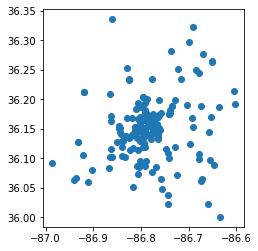

In [46]:
markers.plot()

In [51]:
park_markers = gpd.sjoin(markers, parks, op = 'within')
park_markers

location   latitude  \
55               Paradise Ridge Park,  3000 Morgan Rd.  36.335708   
73       Murphy Road, by the club house in McCabe Park   36.14117   
74                Cornelia Fort Airport, Airpark Drive  36.190367   
79            Centennial Park, front lawn of Parthenon  36.148817   
172                   Centennial Park by Lake Wautauga  36.146883   
80   In front of Two Rivers Mansion, 3130 McGavock ...  36.189087   
89               Corner of Morrow Road and Terry Drive  36.163142   
123  Old Hickory Village Triangle, formed by Old Hi...  36.264259   
132             Owen Bradley Park, 1 Music Square East  36.151803   
150                East Bank Greenway, Cumberland Park   36.16382   
157             Stones River Greenway, past Stone Hall  36.187536   
177      Belle Meade Boulevard at Warner Park entrance  36.082996   
179          Highway 100 at Edwin Warner Park entrance   36.06065   

                                           marker_name  \
55                                      Paradise Ridge   
73                                     Mcconnell Field   
74                               Cornelia Fort Airport   
79                   United Nations Visit to Nashville   
172                 Major Wilbur Fisk Foster 1834-1922   
80                                  Two Rivers Mansion   
89                                    Chickasaw Treaty   
123                               Old Hickory Triangle   
132                                          Music Row   
150  Surrender of Nashville East Bank of the Cumber...   
157                                          Ravenwood   
177                     Percy Warner Park 2058.1 Acres   
179                      Edwin Warner Park 606.7 Acres   

                                           marker_text   longitude  \
55   Named for the Paradise brothers, early settler...   -86.85987   
73   In 1927 the City bought 131 acres from Warren ...  -86.841381   
74   Cornelia Fort (1919-43), Nashville's first wom...   -86.70405   
79   On June 7, 1976, 101 permanent representatives...    -86.8119   
172  Chief Engr. Army of Tenn. C. S. A.; Constructi...  -86.810233   
80   Built in 1859 by David H. McGavock, this mansi...  -86.674773   
89   In 1783, Chickasaw chiefs met with white settl...  -86.863283   
123  This intersection, known as 'The Triangle,' se...  -86.650387   
132  The heart of Nashville's music business, Music...  -86.792075   
150  On Feb. 25, 1862, Nashville became the first C...  -86.772166   
157  Built in 1903 by Judge J.D.B. and Sarah DeBow,...  -86.635742   
177  Percy Warner (1861-1927) was a pioneer in elec...  -86.867072   
179  Edwin Warner (1870-1945) succeeded his brother...    -86.9113   

    year_erected                notes civil_war_site  \
55          2018   Council District 1           None   
73          1970                 None           None   
74          1976                 None           None   
79          1978                 None           None   
172         1975                 None           None   
80          1968                 None           None   
89          1969                 None           None   
123         2002                 None           None   
132         2016                 None           None   
150         2017                 None           TRUE   
157         2018  Council District 14           None   
177         1982                 None           None   
179         1982                 None           None   

                       geometry  index_right          acres  \
55   POINT (-86.85987 36.33571)           14          98.41   
73   POINT (-86.84138 36.14117)           22         208.98   
74   POINT (-86.70405 36.19037)           79         950.18   
79   POINT (-86.81190 36.14882)           36         125.14   
172  POINT (-86.81023 36.14688)           36         125.14   
80   POINT (-86.67477 36.18909)           88          374.3   
89   POINT (-86.86328 36.16314)           10          33.45

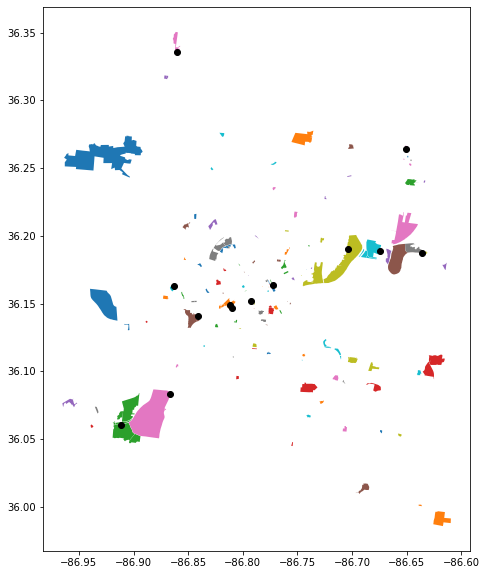

In [54]:
ax = parks.plot(figsize = (8, 10), column = 'common_nam')
park_markers.plot( ax = ax, color='black');
plt.show();

In [105]:
cp = parks['geometry'].unary_union.centroid
print(cp)

POINT (-86.80774392721418 36.15662542600781)


In [106]:
area_center = [cp.y, cp.x]

In [107]:
pnames = parks[['name', 'common_nam', 'geometry']]
pnames

name                     common_nam  \
0      Harpeth River Park                  Harpeth River   
1      Harpeth Knoll Park                  Harpeth Knoll   
2           Bellevue Park                    Red Caboose   
3         Bells Bend Park                     Bells Bend   
4    Alvin G. Beaman Park                         Beaman   
..                    ...                            ...   
119       Riverfront Park            Ascend Amphitheater   
120                  None     Southeast Community Center   
121                  None                      Ravenwood   
122                  None              Browns Creek Park   
123                  None  Whites Creek Community Garden   

                                              geometry  
0    MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...  
1    MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...  
2    MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...  
3    MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...  
4    MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...  
..                                                 ...  
119  MULTIPOLYGON (((-86.77215 36.16130, -86.77074 ...  
120  MULTIPOLYGON (((-86.65684 36.05397, -86.65686 ...  
121  MULTIPOLYGON (((-86.64250 36.19188, -86.64261 ...  
122  MULTIPOLYGON (((-86.77669 36.11392, -86.77659 ...  
123  MULTIPOLYGON (((-86.82873 36.25082, -86.82857 ...  

[124 rows x 3 columns]

In [111]:
parkmap = folium.Map(location = area_center, zoom_start = 10)
folium.GeoJson(pnames).add_to(parkmap)
parkmap

In [188]:
parkmap = folium.Map(location = area_center, zoom_start = 10)
folium.GeoJson(pnames).add_to(parkmap)
for ind, val in park_markers.iterrows():
    loc = [val['latitude'], val['longitude']]
    popi = 'Park Name: ' + str(val['name']) + '<br>' + 'Marker: ' + val['marker_name'] + '<br>' + val['marker_text']
    iframe = folium.IFrame(popi)
    pop = folium.Popup(iframe, min_width=400, max_width=400)
    icon=folium.Icon(color="darkred",icon="info-circle", prefix='fa')
    marker = folium.Marker(
                    location = loc, 
                    popup = pop,
                    icon = icon) 
    marker.add_to(parkmap)

parkmap

In [124]:
art.loc[177, 'geometry'] = Point((-86.701, 36.266))
art.loc[139, 'geometry'] = Point((-86.701, 36.266))
art.loc[106, 'geometry'] = Point((-86.701, 36.266))

In [125]:
art

first_name                       location project_status   latitude  \
0            KJ      Historic Metro Courthouse       Complete  36.166747   
1    Michael J.      Historic Metro Courthouse       Complete  36.166747   
2          Paul          Metro Office Building       Complete  36.153121   
3          Bill      Historic Metro Courthouse       Complete  36.166747   
4         Brady      Historic Metro Courthouse       Complete  36.166747   
..          ...                            ...            ...        ...   
173         Gil      Historic Metro Courthouse       Complete  36.166747   
174      Austin      Historic Metro Courthouse       Complete  36.166747   
175        Edie         Madison Branch Library       Complete   36.25756   
176    Lawrence                    Shelby Park       Complete  36.168381   
177  Brandon J.  Madison Park Community Center       Complete  36.265752   

                                           description  \
0    These works are primarily about creative pract...   
1    Created during a live painting exhibition, thi...   
2    This work is part of a series of on-site drawi...   
3    The subject is a close friend of the artist, a...   
4    Based on impressions and landmarks of Nashvill...   
..                                                 ...   
173  Through exploring what happens when paint leav...   
174  Hand lettered and near dilapidated old signpos...   
175  Forever Sublime denotes something that is elev...   
176  Installed fall of 2012, Reflection is located ...   
177  The Art of Fitness is a three-part public art ...   

                                          medium   longitude   last_name  \
0             colored tape over color photograph  -86.778286  Schumacher   
1                              acrylic on canvas  -86.778286     McBride   
2                       ink (posca pen) on paper  -86.768797     Collins   
3                                   oil on linen  -86.778286   Killebrew   
4                                   oil on linen  -86.778286      Haston   
..                                           ...         ...         ...   
173  acrylic on wood, canvas and plexiglass rods  -86.778286       Given   
174      watercolor with colored pencil on paper  -86.778286      Reavis   
175                            Acrylic on canvas   -86.71545       Maney   
176                stainless steel, granite base  -86.729916      Argent   
177                  digital prints, vinyl lamin   -866.7006     Donahue   

                                             page_link  \
0    https://www.metroartsnashville.com/fullscreen-...   
1    https://www.metroartsnashville.com/fullscreen-...   
2    https://www.metroartsnashville.com/fullscreen-...   
3    https://www.metroartsnashville.com/fullscreen-...   
4    https://www.metroartsnashville.com/fullscreen-...   
..                                                 ...   
173  https://www.metroartsnashville.com/fullscreen-...   
174  https://www.metroartsnashville.com/fullscreen-...   
175  https://www.metroartsnashville.com/lending-lib...   
176  https://www.metroartsnashville.com/fullscreen-...   
177  https://www.metroartsnashville.com/fullscreen-...   

                                   artwork                    geometry  
0                                 B.032.02  POINT (-86.77829 36.16675)  
1    Dancing  in the Streets of Music City  POINT (-86.77829 36.16675)  
2          Idle Bloom at Grimey's Basement  POINT (-86.76880 36.15312)  
3                        News of The World  POINT (-86.77829 36.16675)  
4                                   Runner  POINT (-86.77829 36.16675)  
..                                     ...                         ...  
173                             Sentinel I  POINT (-86.77829 36.16675)  
174                               Untitled  POINT (-86.77829 36.16675)  
175                        Forever Sublime  POINT (-86.71545 36.25756)  
176                             Reflection  POINT (-86.

<AxesSubplot:>

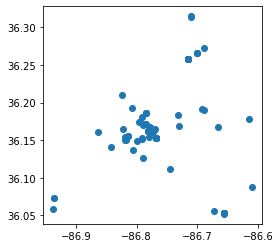

In [126]:
art.plot()

art.loc[177, 'longitude'] = -86.7006
art.loc[139, 'longitude'] = -86.7006
art.loc[106, 'longitude'] = -86.7006


In [127]:
art.loc[177, 'longitude'] = '-86.7006'
art.loc[139, 'longitude'] = '-86.7006'
art.loc[106, 'longitude'] = '-86.7006'

In [128]:
art

first_name                       location project_status   latitude  \
0            KJ      Historic Metro Courthouse       Complete  36.166747   
1    Michael J.      Historic Metro Courthouse       Complete  36.166747   
2          Paul          Metro Office Building       Complete  36.153121   
3          Bill      Historic Metro Courthouse       Complete  36.166747   
4         Brady      Historic Metro Courthouse       Complete  36.166747   
..          ...                            ...            ...        ...   
173         Gil      Historic Metro Courthouse       Complete  36.166747   
174      Austin      Historic Metro Courthouse       Complete  36.166747   
175        Edie         Madison Branch Library       Complete   36.25756   
176    Lawrence                    Shelby Park       Complete  36.168381   
177  Brandon J.  Madison Park Community Center       Complete  36.265752   

                                           description  \
0    These works are primarily about creative pract...   
1    Created during a live painting exhibition, thi...   
2    This work is part of a series of on-site drawi...   
3    The subject is a close friend of the artist, a...   
4    Based on impressions and landmarks of Nashvill...   
..                                                 ...   
173  Through exploring what happens when paint leav...   
174  Hand lettered and near dilapidated old signpos...   
175  Forever Sublime denotes something that is elev...   
176  Installed fall of 2012, Reflection is located ...   
177  The Art of Fitness is a three-part public art ...   

                                          medium   longitude   last_name  \
0             colored tape over color photograph  -86.778286  Schumacher   
1                              acrylic on canvas  -86.778286     McBride   
2                       ink (posca pen) on paper  -86.768797     Collins   
3                                   oil on linen  -86.778286   Killebrew   
4                                   oil on linen  -86.778286      Haston   
..                                           ...         ...         ...   
173  acrylic on wood, canvas and plexiglass rods  -86.778286       Given   
174      watercolor with colored pencil on paper  -86.778286      Reavis   
175                            Acrylic on canvas   -86.71545       Maney   
176                stainless steel, granite base  -86.729916      Argent   
177                  digital prints, vinyl lamin    -86.7006     Donahue   

                                             page_link  \
0    https://www.metroartsnashville.com/fullscreen-...   
1    https://www.metroartsnashville.com/fullscreen-...   
2    https://www.metroartsnashville.com/fullscreen-...   
3    https://www.metroartsnashville.com/fullscreen-...   
4    https://www.metroartsnashville.com/fullscreen-...   
..                                                 ...   
173  https://www.metroartsnashville.com/fullscreen-...   
174  https://www.metroartsnashville.com/fullscreen-...   
175  https://www.metroartsnashville.com/lending-lib...   
176  https://www.metroartsnashville.com/fullscreen-...   
177  https://www.metroartsnashville.com/fullscreen-...   

                                   artwork                    geometry  
0                                 B.032.02  POINT (-86.77829 36.16675)  
1    Dancing  in the Streets of Music City  POINT (-86.77829 36.16675)  
2          Idle Bloom at Grimey's Basement  POINT (-86.76880 36.15312)  
3                        News of The World  POINT (-86.77829 36.16675)  
4                                   Runner  POINT (-86.77829 36.16675)  
..                                     ...                         ...  
173                             Sentinel I  POINT (-86.77829 36.16675)  
174                               Untitled  POINT (-86.77829 36.16675)  
175                        Forever Sublime  POINT (-86.71545 36.25756)  
176                             Reflection  POINT (-86.

In [132]:
park_art = gpd.sjoin(art, parks, op='within')
park_art = park_art.reset_index(drop=True)
park_art

first_name                          location project_status  \
0              KJ         Historic Metro Courthouse       Complete   
1      Michael J.         Historic Metro Courthouse       Complete   
2            Bill         Historic Metro Courthouse       Complete   
3           Brady         Historic Metro Courthouse       Complete   
4          Bryant         Historic Metro Courthouse       Complete   
..            ...                               ...            ...   
86          Buddy                      Hartman Park       Complete   
87    Christopher  Shelby Bottoms Pedestrian Bridge       Complete   
88          Randy                       Hadley Park       Complete   
89  Laura and Tom                   Riverfront Park       Complete   
90       Lawrence                       Shelby Park       Complete   

      latitude                                        description  \
0    36.166747  These works are primarily about creative pract...   
1    36.166747  Created during a live painting exhibition, thi...   
2    36.166747  The subject is a close friend of the artist, a...   
3    36.166747  Based on impressions and landmarks of Nashvill...   
4    36.166747  4,743 people were lynched in the United States...   
..         ...                                                ...   
86    36.20981  From emergency comes emergence. Buddy Jackson’...   
87   36.190825  Referencing the tremendous clean-up efforts by...   
88  36.1650866  Since 2009, Metro Arts has commissioned local ...   
89  36.1602534  Light Meander, 45 feet tall, three-feet wide a...   
90   36.168381  Installed fall of 2012, Reflection is located ...   

                                               medium    longitude  \
0                  colored tape over color photograph   -86.778286   
1                                   acrylic on canvas   -86.778286   
2                                        oil on linen   -86.778286   
3                                        oil on linen   -86.778286   
4                            mixed media on hardboard   -86.778286   
..                                                ...          ...   
86                                reinforced concrete   -86.824725   
87                     steel tools, steel pipe, paint   -86.691912   
88                                powder coated steel  -86.8222596   
89  stainless steel plate and tube, hardwood, colo...  -86.7727681   
90                      stainless steel, granite base   -86.729916   

            last_name                                          page_link  \
0          Schumacher  https://www.metroartsnashville.com/fullscreen-...   
1             McBride  https://www.metroartsnashville.com/fullscreen-...   
2           Killebrew  https://www.metroartsnashville.com/fullscreen-...   
3              Haston  https://www.metroartsnashville.com/fullscreen-...   
4              Lamont  https://www.metroartsnashville.com/fullscreen-...   
..                ...                                                ...   
86            Jackson  https://www.metroartsnashville.com/fullscreen-...   
87            Fennell  https://www.metroartsnashville.com/fullscreen-...   
88            Purcell  https://www.metroartsnashville.com/fullscreen-...   
89  Haddad and Drugan  https://www.metroartsnashville.com/fullscreen-...   
90             Argent  https://www.metroartsnashville.com/fullscreen-...   

                                  artwork  ...   acres  \
0                                B.032.02  ...    6.01   
1   Dancing  in the Streets of Music City  ...    6.01   
2                       News of The World  ...    6.01   
3                                  Runner  ...    6.01   
4                            4743 REASONs  ...    6.01   
..                                    ...  ...     ...   
86                              Emergence  ...    54.2   
87                              Tool Fire  ...  950.18   
88                              Bee Cycle  ...    30.7   
89 

In [189]:
parkartmap = folium.Map(location = area_center, zoom_start = 11)
folium.GeoJson(pnames).add_to(parkartmap)
for ind, val in park_art.iterrows():
    loc = [val['latitude'], val['longitude']]
    popi = 'Park Name: ' + str(val['common_nam']) + '<br>' + 'Title: ' + str(val['artwork']) + '<br>' + 'Artist Name: ' + str(val['first_name']) + ' ' + str(val['last_name']) + '<br>' + str(val['description'])
    iframe = folium.IFrame(popi)
    pop = folium.Popup(iframe,
                       min_width = 500,
                       max_width = 500)
    icon=folium.Icon(color="purple",
                     icon="paint-brush", 
                     prefix='fa')
    marker = folium.Marker(
        location = loc, 
        popup = pop, 
        icon = icon) 
    marker.add_to(parkartmap)

parkartmap

#### Zoe's code, getting different color icons based on value in a specified column

map_nash = folium.Map(location = nash_center, zoom_start = 12)

folium.GeoJson(polygonNash).add_to(map_nash)

for row_index, row_values in racks_by_zip.iterrows():

    if row_values['status'] == 'Existing':
    
        loc = [row_values['lat'], row_values['lon']]
        
        pop = (row_values['detail_loc']), (row_values['status'])
        
        icon=folium.Icon(color="green",icon="bicycle", prefix='fa')
        
    elif row_values['status'] == 'Proposed':
    
        loc = [row_values['lat'], row_values['lon']]
        
        pop = row_values['detail_loc'], row_values['status']
        
        icon=folium.Icon(color="red",icon="bicycle", prefix='fa')
        
    else:
    
        loc = [row_values['lat'], row_values['lon']]
        
        pop = row_values['detail_loc'], row_values['status']
        
        icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
        
        marker = folium.Marker(location = loc, 
           
           popup = pop, 
            
            icon = icon) 
            
    marker = folium.Marker(location = loc,
       
       popup = pop, 
       
       icon = icon)
    
    marker.add_to(map_nash)

map_nash.save('../data/map_nash_bike.html')
map_nash